<a href="https://colab.research.google.com/github/Hrit-Saha/CODESOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▶ TASK-1: Titanic Survival Prediction

| Author: Hrit Saha
| Batch: June
| Domain: Data Science

# Titanic Survival Prediction


---


## Dataset Desciption:
`Source`: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

###**Context**
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


###**Content**
The dataset used for model building contained 891 observations of 12 variables. The data contains the following information:

* `Passenger ID`: Numeric feature representing the passengerID.

* `Survived`: Categorical feature indicating weather the passenger survived or not

* `Pclass`: Numerical feature representing the class of the passenger.

* `Name`: Representing the name of the passenger.

* `Sex`: Categorical feature indicating the age of the passenger.

* `Age`: Numerical feature indicating the age of the passenger.

* `SibSp`: Representing no. of siblings / spouses aboard the Titanic

* `Parch`: Representing no. of parents / children aboard the Titanic

* `Ticket`: Representing the ticket no. of the passenger.

* `Fare`: Representing the passenger fare.

* `Cabin`: Representing the cabin no. of the passenger.

* `Embarked`: Embarked implies where the passenger mounted from.

## Import visual libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Import the dataset

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")

## Getting basic Information

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling the missing data

In [13]:
data = data.drop(columns='Cabin', axis=1)

In [14]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [15]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

# Exploratory Data Analysis(EDA)

The nature of the given data can be better understood when can visually analyse the distribution of features and corelations between the features.

## Visualization of the data

Sex
male      577
female    314
Name: count, dtype: int64


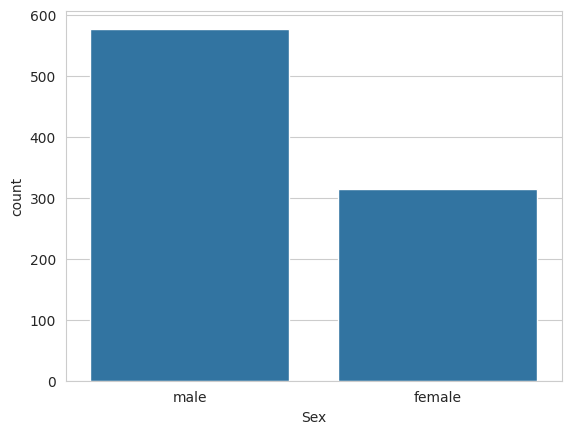

In [ ]:
sns.countplot(data=data, x="Sex")
print(data.value_counts("Sex"))

<Axes: xlabel='Sex', ylabel='count'>

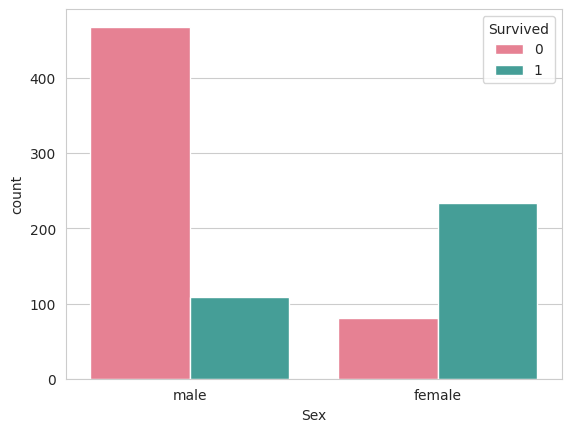

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=data)

<ipython-input-12-70c51f9ac1c6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

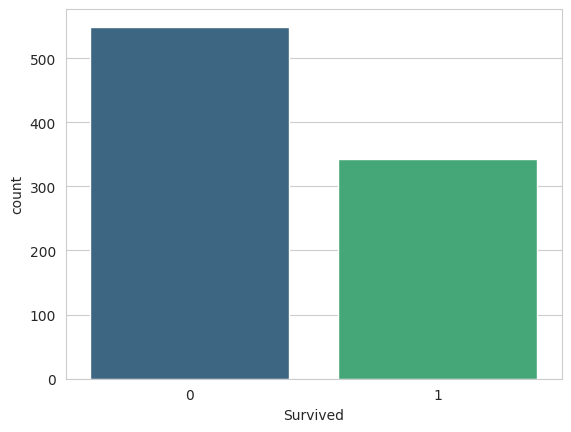

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='viridis')

<Axes: xlabel='Survived', ylabel='count'>

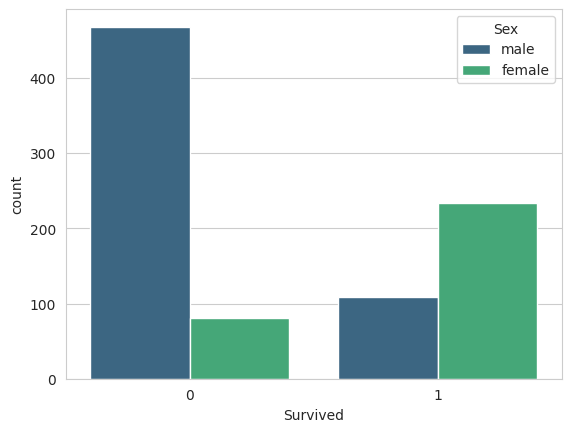

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='viridis')

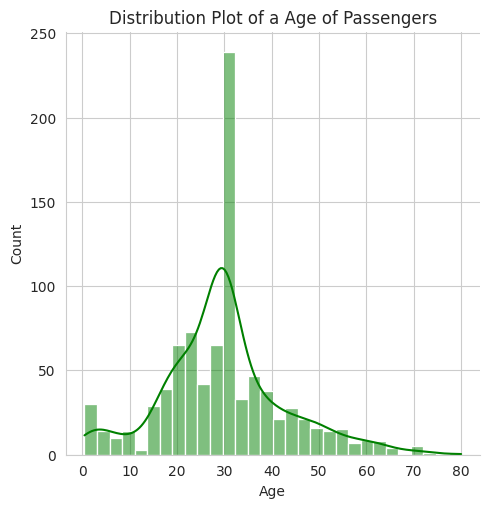

In [ ]:
sns.displot(data['Age'], kde=True, bins=30, color='green')
plt.title('Distribution Plot of a Age of Passengers')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

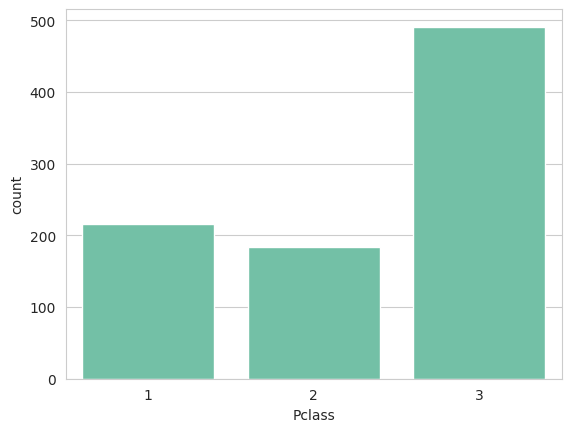

In [ ]:
sns.countplot(x='Pclass', data=data)

<Axes: xlabel='Survived', ylabel='count'>

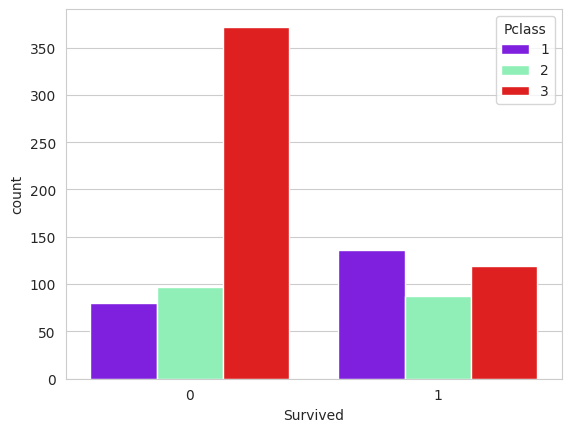

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

<Axes: xlabel='SibSp', ylabel='count'>

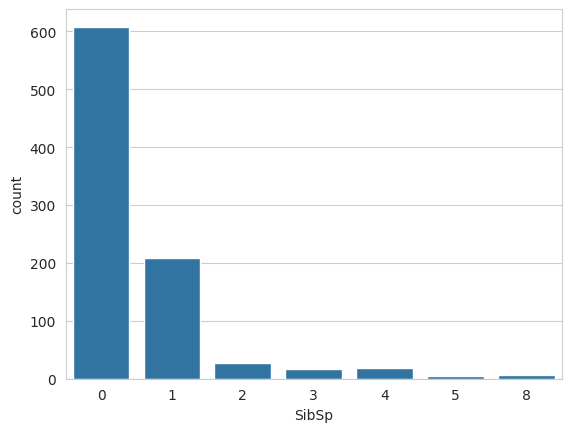

In [ ]:
sns.countplot(x='SibSp',data=data)

In [ ]:
sv_sibling = data[['Survived', 'SibSp']].value_counts().reset_index()

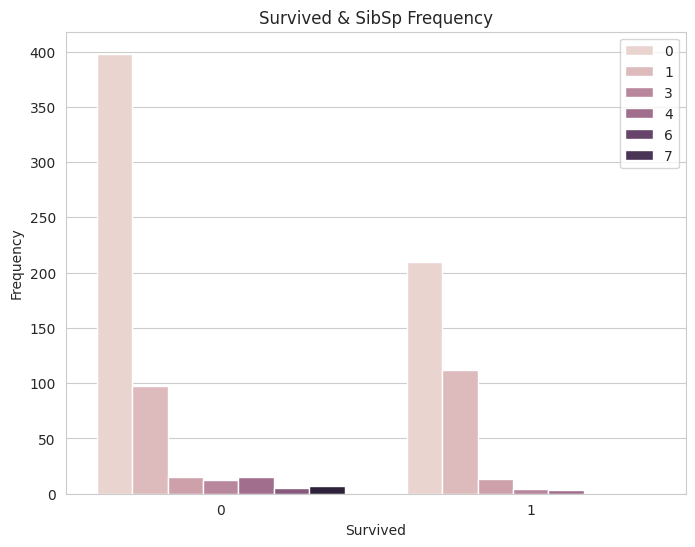

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_sibling , x=sv_sibling['Survived'], y=sv_sibling['count'], hue=sv_sibling['SibSp'])
plt.title('Survived & SibSp Frequency')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

<Axes: >

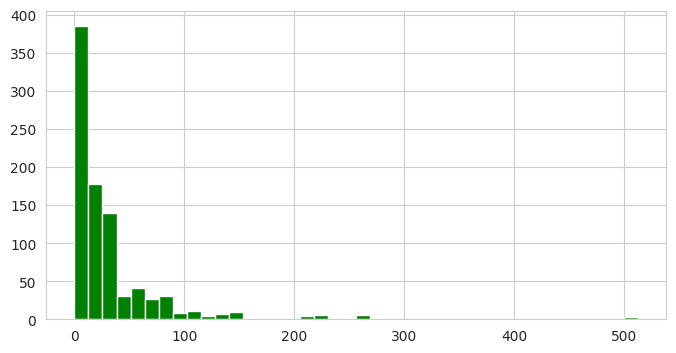

In [ ]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: >

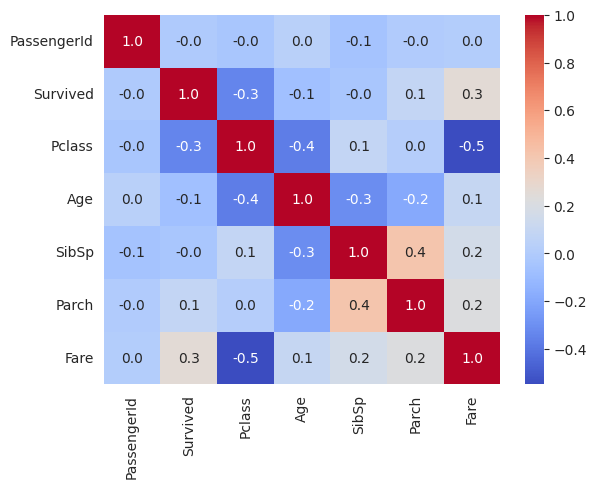

In [ ]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap = "coolwarm",fmt = ".1f",cbar = True)

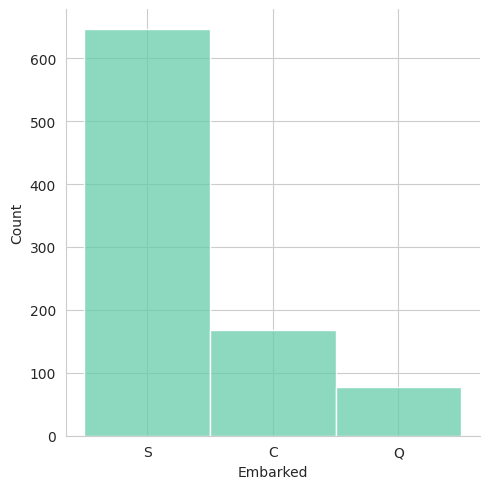

In [ ]:
custom_palette = ["#66CDAA"]
sns.set_palette(custom_palette)
sns.displot(data=data, x="Embarked")

# ML Model Prediction

By analysis the complexity of data based on various aspects like number of features, their varying scales, distribution of numerical features and the labels of categorical features, we can come to the conclusion that certain ML models may fit well to this dataset and predict target variable with high accuracy.
1. `Logistic Regression`


`Survived` target feature and it is of categorical nature.

## Encoding the categorical feature

In [16]:
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [17]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## ML Model Fitting

### Train-test split

In [19]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model with training data

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Prediction and Evaluation

In [22]:
prediction = model.predict(X_test)

### Making the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print(cm)
accuracy_score(y_test, prediction)

[[91  9]
 [30 49]]


0.7821229050279329

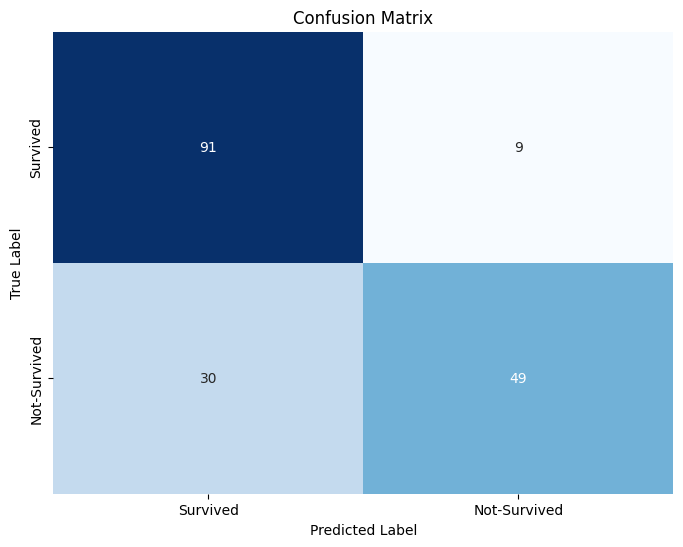

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Survived', 'Not-Survived'], yticklabels=['Survived', 'Not-Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()